# Backpropagation with numpy

This notebook shows the basic Backpropagationalgorithm implemented with numpy on the following 2 hidden-layer-architecture:![](backpropagation_deep_net.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Inputs
X = np.array([0.1, 0.8])
X.shape = (2,1)

#labels
y = np.array([0,0, 1])
y.shape = (3,1)

#biases
b_one = np.array([0.1,0.6])
b_one.shape = (2,1)
b_two = np.array([0.2, 0.1, 0.4])
b_two.shape = (3,1)

# Weights #
W_one = np.array([[0.2, 0.5], [0.3, 0.4]])
W_one.shape = (2,2)
W_two = np.array([[0.1, 0.3], [0.7, 0.4], [0.01, 0.02]])
W_two.shape = (3,2)

In [3]:
# Outputs #
print('-----------------------')
print('Initialize Variables')
print('-----------------------')
print('Output X: ', X.shape)
print('Output y: ', y.shape)
print('Output b_one: ', b_one.shape)
print('Output b_two: ', b_two.shape)
print('Output W_one: ', W_one.shape)
print('Output W_two: ', W_two.shape)
print('-----------------------')

-----------------------
Initialize Variables
-----------------------
Output X:  (2, 1)
Output y:  (3, 1)
Output b_one:  (2, 1)
Output b_two:  (3, 1)
Output W_one:  (2, 2)
Output W_two:  (3, 2)
-----------------------


In [4]:
# Forward Propagation #
def forward_propagate(w, x, b):
    z = np.dot(w, x) + b
    return z


# Sigmoid #
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Evaluating Output Layer #
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


# Delta Rule on Output Layer #
def delta_output_layer(y, f):
    l = -1 * (y - f)
    return l


# Delta Rule on Hidden Layer #
def delta_output_layer_hidden(w, l, z):
    _w = w.T
    _z = sigmoid(z)
    l_hidden = np.dot(_w, l) * (_z * (1 - _z))
    return l_hidden


# Gradient for Weights #
def gradient_weight(l, a):
    _a = a.T
    w = np.dot(l, _a)
    return w


# Gradient for Biases #
def gradient_bias(l):
    b = l
    return b

In [5]:
def updateWeights(gradient_weight_one, gradient_bias_one, gradient_weight_two,gradient_bias_two):
    global W_one, b_one, W_two, b_two
    #w1
    W_one = W_one -lr * gradient_weight_one
    #b1
    b_one= b_one - lr * gradient_bias_one
    #w2
    W_two = W_two -lr * gradient_weight_two
    #b2
    b_two = b_two - lr * gradient_bias_two

In [6]:
def step(step,lr):
    #Run Network: Forward Pass

    # Perform Forward Propagation & Evaluate Output
    a_one = sigmoid(X)
    z_two = forward_propagate(W_one, a_one, b_one)
    a_two = sigmoid(z_two)
    z_three = forward_propagate(W_two, a_two, b_two)
    a_three = sigmoid(z_three)
    f = softmax(z_three)
    
    #calc error
    l_out = delta_output_layer(y, f)
    sumloss = np.sum(np.absolute(l_out))

    print("Step " + str(step) + ': error: ', sumloss)

    #Backpropagate
    # Hidden Delta #
    hidden_delta_two = delta_output_layer_hidden(W_two, l_out, z_two)
    hidden_delta_one = delta_output_layer_hidden(W_one, hidden_delta_two, X)

    # Gradient Biases and Weights #
    gradient_weight_two = gradient_weight(l_out, a_two)
    gradient_weight_one = gradient_weight(hidden_delta_two, X)
    gradient_bias_two = gradient_bias(l_out)
    gradient_bias_one = gradient_bias(hidden_delta_two)
    
    # appy gradients to weights and biases
    updateWeights(gradient_weight_one, gradient_bias_one, gradient_weight_two, gradient_bias_two)
    
    return sumloss


In [7]:
lr = 0.1
loss_history = []
for i in range(200):
    loss_history.append(step(i,lr))

Step 0: error:  1.4420162324745758
Step 1: error:  1.3520248120983118
Step 2: error:  1.2618613149161053
Step 3: error:  1.1737856203258699
Step 4: error:  1.0895625541114398
Step 5: error:  1.010394818767026
Step 6: error:  0.9369605721877481
Step 7: error:  0.8695104369565894
Step 8: error:  0.8079828032098109
Step 9: error:  0.752110681734142
Step 10: error:  0.7015077788477138
Step 11: error:  0.6557313855495117
Step 12: error:  0.6143248184281631
Step 13: error:  0.5768439410715929
Step 14: error:  0.5428722648930022
Step 15: error:  0.5120283499099358
Step 16: error:  0.48396829064819036
Step 17: error:  0.4583852414184437
Step 18: error:  0.4350072880321816
Step 19: error:  0.4135945054696324
Step 20: error:  0.3939357195691981
Step 21: error:  0.37584527774751597
Step 22: error:  0.3591599967551075
Step 23: error:  0.34373636988204126
Step 24: error:  0.3294480642435812
Step 25: error:  0.3161837087185293
Step 26: error:  0.30384495672536393
Step 27: error:  0.2923448000396894


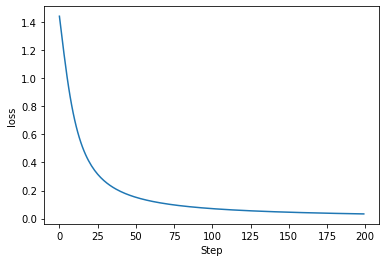

In [8]:
plt.plot(loss_history)
plt.xlabel('Step')
plt.ylabel('loss')
plt.show()

## Test (on training data)

Input [0.1, 0.8]. Output should be close to [0,0, 1], as defined in the training data.

In [12]:
input_test = np.array([0.1, 0.8])
input_test.shape = (2,1)

# Perform Forward Propagation & Evaluate Output
a_one = sigmoid(input_test)
z_two = forward_propagate(W_one, a_one, b_one)
a_two = sigmoid(z_two)
z_three = forward_propagate(W_two, a_two, b_two)
a_three = sigmoid(z_three)
f = softmax(z_three)
print ("Output:\n" +str(f))

Output:
[[0.00791442]
 [0.00863512]
 [0.98345046]]
